<a href="https://colab.research.google.com/github/NatnaelTDaba/CAP5610/blob/main/CAP5610_hw3_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import numpy as np               
import pandas as pd              
import matplotlib.pyplot as plt 
import os
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import pickle
os.chdir('/content/drive/MyDrive/UCF/CAP5610/')

# Task 2

## Plotting data

In [129]:
x = np.array([[-1,-1],
              [-1,1],
              [1,-1],
              [1,1]])

Text(0.5, 1.0, 'Scatter plot of data to be classified')

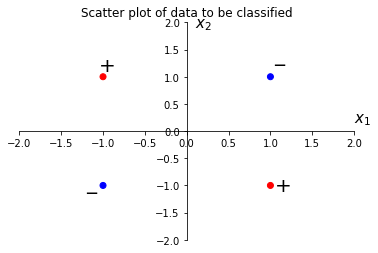

In [130]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.scatter(x[:,0],x[:,1],c=['b','r','r','b'])
plt.text(-1.2,-1.05,'_', fontsize=20)
plt.text(1.05,-1.1,'+', fontsize=20)
plt.text(1.05,1.3,'_', fontsize=20)
plt.text(-1.05,1.1,'+', fontsize=20)
plt.text(2,0.15,'$x_1$', fontsize=15)
plt.text(0.1,1.9,'$x_2$', fontsize=15)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Scatter plot of data to be classified')

## Transforming $(x_1, x_2)$ to $(x_1, x_1x_2)$

In [131]:
x1x2 = np.prod(x,axis=1)

In [132]:
x_new = np.array([x[:,0], x1x2]).T

In [133]:
x_new

array([[-1,  1],
       [-1, -1],
       [ 1, -1],
       [ 1,  1]])

Text(0.5, 1.0, 'Scatter plot of transformed data')

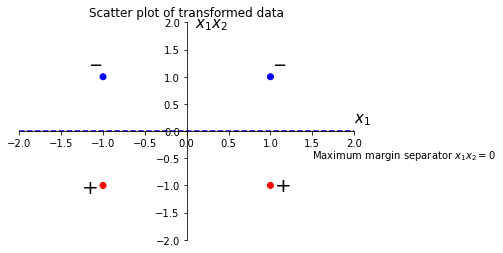

In [134]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
a = np.arange(-2,2.2,0.1)

plt.scatter(x_new[:,0],x_new[:,1],c=['b','r','r','b'])
plt.plot(a,np.zeros_like(a),'b--')
plt.text(-1.25,-1.15,'+', fontsize=20)
plt.text(1.05,-1.1,'+', fontsize=20)
plt.text(1.05,1.3,'_', fontsize=20)
plt.text(-1.15,1.3,'_', fontsize=20)
plt.text(1.5,-0.5,r'Maximum margin separator $x_1x_2 = 0$')
plt.text(2,0.15,'$x_1$', fontsize=15)
plt.text(0.1,1.9,'$x_1x_2$', fontsize=15)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Scatter plot of transformed data')

From the figure above, we can see that after transforming the feature vectors from the space of $(x_1, x_2)$ to $(x_1, x_1x_2)$, all the negative class points are above the $x_1$ axis and all the positive class points are below the $x_1$ axis. Thus, the data is now linearly seprable.

**Note**: in the above figure, the horizontal axis represents $x_1$ and the vertical axis represents $x_1x_2$. 

Notice how the $x_1x_2 = 0$ hyperplane (it's a line in our case) separates the two classes with a maximum margin. This is shown by the blue dotted horizontal axis in the figure above. The points are now linearly separable in this new space $(x_1, x_1x_2)$ by the maximum margin separator hyperplane $x_1x_2 = 0$ or by the lines $x_1 = 0 and x_2 = 0$ in the original space $(x_1, x_2)$


## Computing the margin

The margin can be easly computed by inspection because we know the support vectors and the maximum margin separator. From the above figure, we can see that the margin is 1 because the distance between the support vectors and the separating hyperplane is 1.

# Task 5

In [135]:
p = np.array([[1,1],
              [2,2],
              [2,0],
              [0,0],
              [1,0],
              [0,1]])

Text(0.5, 1.0, 'Linearly separable data')

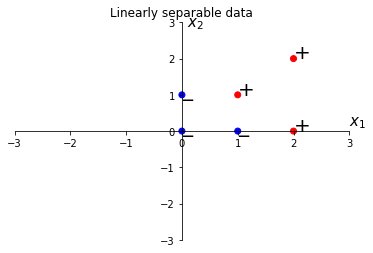

In [136]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.scatter(p[:,0],p[:,1],c=['r','r','r','b','b','b'])
plt.text(p[0,0],p[0,1],'+', fontsize=20)
plt.text(p[1,0],p[1,1],'+', fontsize=20)
plt.text(p[2,0],p[2,1],'+', fontsize=20)
plt.text(p[3,0],p[3,1],'_', fontsize=20)
plt.text(p[4,0],p[4,1],'_', fontsize=20)
plt.text(p[5,0],p[5,1],'_', fontsize=20)
plt.text(3,0.15,'$x_1$', fontsize=15)
plt.text(0.1,2.9,'$x_2$', fontsize=15)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title("Linearly separable data")

Text(0.5, 1.0, 'Linearly separable data with support vectors')

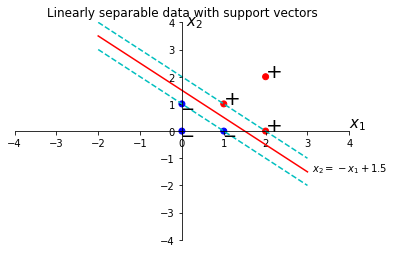

In [137]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.scatter(p[:,0],p[:,1],c=['r','r','r','b','b','b'])
plt.text(p[0,0],p[0,1],'+', fontsize=20)
plt.text(p[1,0],p[1,1],'+', fontsize=20)
plt.text(p[2,0],p[2,1],'+', fontsize=20)
plt.text(p[3,0],p[3,1],'_', fontsize=20)
plt.text(p[4,0],p[4,1],'_', fontsize=20)
plt.text(p[5,0],p[5,1],'_', fontsize=20)
plt.text(4,0.15,'$x_1$', fontsize=15)
plt.text(0.1,3.9,'$x_2$', fontsize=15)
plt.text(3.1,-1.5,'$x_2= -x_1 + 1.5$')
plt.xlim(-4,4)
plt.ylim(-4,4)

plt.plot([-2,3],[3,-2],'c--')
plt.plot([-2,3],[4,-1],'c--')
plt.plot([-2,3],[3.5,-1.5],'r-')
plt.title("Linearly separable data with support vectors")

# Task 6

In [138]:
def phi(x):
  return [1, round(np.sqrt(2)*x,3), x**2]

In [139]:
p = np.array([phi(i) for i in [-1,0,1]])

In [140]:
p

array([[ 1.   , -1.414,  1.   ],
       [ 1.   ,  0.   ,  0.   ],
       [ 1.   ,  1.414,  1.   ]])

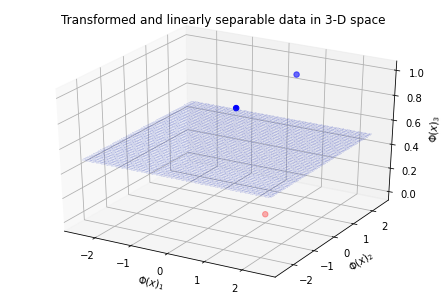

In [142]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter3D(p[:,0],p[:,1],p[:,2],c=['b','r','b'],s=30)
tmp = np.linspace(-2.5,2.5,100)
x,y = np.meshgrid(tmp,tmp)
z = 0.5*np.ones((1,100))


ax.set_xlabel('$\Phi(x)_1$')
ax.set_ylabel('$\Phi(x)_2$')
ax.set_zlabel('$\Phi(x)_3$')

ax.plot_surface(x,y,z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.1)

plt.title("Transformed and linearly separable data in 3-D space")

plt.show()

# Task 7

Note: The result of preprocessing the training data from hw2 is used to avoid repeating the entire process again. I.e. We will be working with an already preprocessed data from my hw2 solution.

In [147]:
f = open('xTrain_hw2_preproc.pkl','rb')
xTrain = pickle.load(f)
f.close()
f = open('yTrain_hw2_preproc.pkl','rb')
yTrain = pickle.load(f)
f.close()

In [148]:
svc_linear = SVC(gamma = "auto",kernel='linear')
svc_quad = SVC(gamma="auto",kernel='poly',degree=2)
svc_rbf = SVC(gamma="auto",kernel='rbf')

In [149]:
svc_linear.fit(xTrain, yTrain)
svc_quad.fit(xTrain, yTrain)
svc_rbf.fit(xTrain, yTrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [151]:
x_val_linear = round(cross_val_score(svc_linear, xTrain, yTrain, cv = 5, scoring="accuracy").mean()*100, 2)
x_val_quad = round(cross_val_score(svc_quad, xTrain, yTrain, cv = 5, scoring="accuracy").mean()*100, 2)
x_val_rbf = round(cross_val_score(svc_rbf, xTrain, yTrain, cv = 5, scoring="accuracy").mean()*100, 2)
print("Average classification accuracies:")
print("Linear kernel: ", x_val_linear, "%")
print("Quadratic kernel: ", x_val_quad, "%")
print("RBF kernel: ", x_val_rbf, "%")

Average classification accuracies:
Linear kernel:  82.71 %
Quadratic kernel:  80.47 %
RBF kernel:  82.38 %
